# Raumluftqualität 6.0

Für einen belüfteten Raum ist

$$
  k(t) = k_\infty + (k_0-k_\infty)\,\rm{e}^{-\beta\,t}
$$

Dieser exponentielle Verlauf nähert sich dem Wert $k_\infty$ immer stärker an, kann ihn theoretisch aber nicht erreichen. Das hat seinen Grund darin, dass die Exponentialfunktion (theoretisch) niemals den Wert 0 annehmen kann.

Für praktische Zwecke ist das Modell sehr gut geeignet, weil es die Annäherung von $k(t)$ an $k_\infty$ sehr gut zeigt.

In [1]:
from sympy import *
init_printing()

from matplotlib import pyplot as plt, ticker as tk
%config InlineBackend.figure_format='retina' # nur für Macbook Pro nötig

import numpy as np
import pandas as pd

from fun_expr import Function_from_Expression as FE

In [2]:
# Die Funktionsvariable definieren
t = Symbol('t')

# bekannte Konstanten
k_zul = 1000e-6
k_0 = k_au = 400e-6

beta = 0.5
t_0 = 0

# Die Funktion k(t) definieren
k = FE(t, k_zul + (k_0-k_zul)*exp(-beta*(t-t_0)),name='k')
k.equation()

<IPython.core.display.Math object>

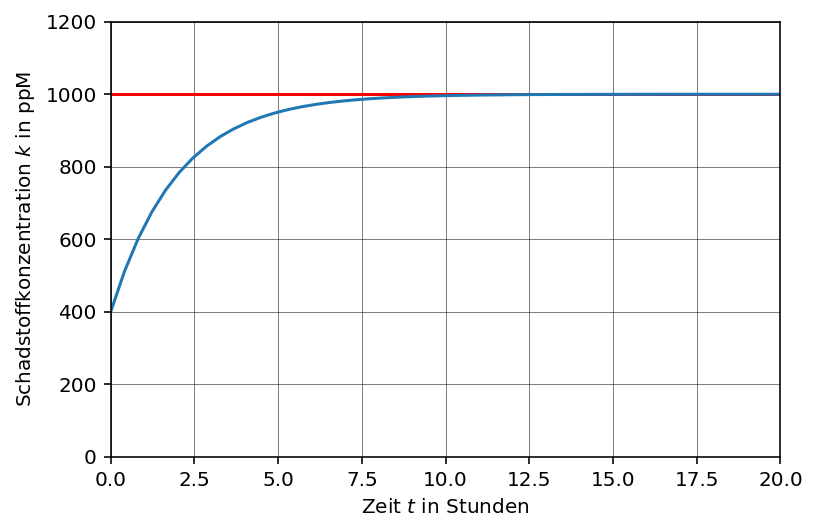

In [3]:
fig,ax = plt.subplots()

ax.axhline(1e6*k_zul,c='r')

lx = np.linspace(0,20)
ax.plot(lx,1e6*k.lambdified(lx))

ax.set(
    ylim=(0,1200), ylabel='Schadstoffkonzentration $k$ in ppM',
    xlim=(0,20), xlabel='Zeit $t$ in Stunden'
)

Delta_k = (k_zul-k_0)*5e-2

#ax.fill_between(lx, 1e6*(k_zul+Delta_k), 1e6*(k_zul-Delta_k),color='r',alpha=0.25)

ax.grid(c='k',lw=0.25)

Wichtig ist die Frage, wann der Gleichgewichtszustand erreicht ist. Für diese Frage
ist die Exponentialfunktion nicht so gut geeignet, weil der Zustand $k_\infty$ theoretisch nie erreicht wird.

Deshalb kann nicht berechnet werden, wie lange es dauert, bis dieser Zustand erreicht ist.

Man stellt sich in diesem Fall nicht die Frage, wann der Grenzwert wirklich erreicht wird, sondern fragt stattdessen, wann ein bestimmtes "Toleranzband" erreicht wird. 

Ein solches Toleranzband kann man sich wie einen Schlauch vorstellen, in dessen Mitte $k_\infty$ liegt.

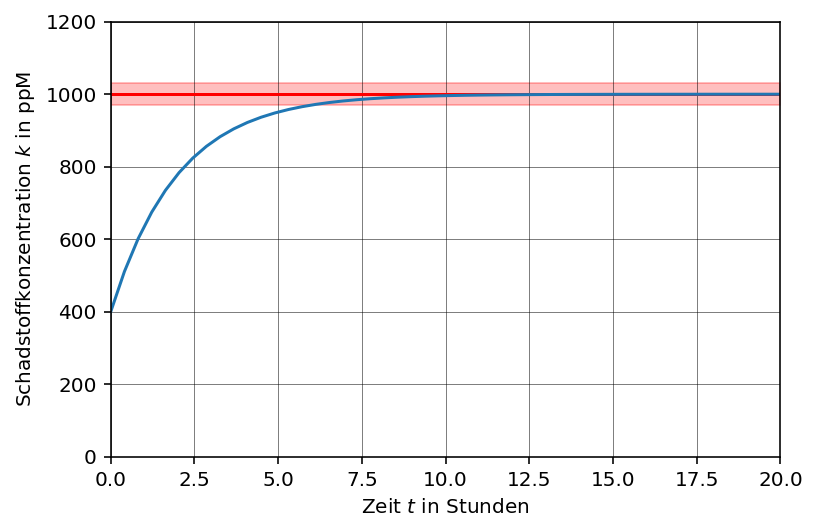

In [6]:
fig,ax = plt.subplots()

ax.axhline(1e6*k_zul,c='r')

lx = np.linspace(0,20)
ax.plot(lx,1e6*k.lambdified(lx))

ax.set(
    ylim=(0,1200), ylabel='Schadstoffkonzentration $k$ in ppM',
    xlim=(0,20), xlabel='Zeit $t$ in Stunden'
)

Delta_k = (k_zul-k_0)*5e-2

ax.fill_between(lx, 1e6*(k_zul+Delta_k), 1e6*(k_zul-Delta_k),color='r',alpha=0.25)

#ax.scatter(6,970,c='k')

ax.grid(c='k',lw=0.25)

Hat das "Toleranzband" eine Breite von $\pm 5\%$, kann man sich die Rechnung sparen. Dann hat $t$ etwa den Wert von drei Zeitkonstanten, also sechs Stunden.

Wie berechnet man den Zeitpunkt, an dem $k(t)$ das Toleranzband erreicht?

$$
  k(t) = k_\infty + (k_0-k_\infty)\cdot\mathrm{e}^{-\beta\,t}
$$

Wir setzen

$$
  k(t) = k_\infty - (k_\infty - k_0)\cdot\epsilon
$$

Gleichsetzen liefert:

$$
  k_\infty + (k_0-k_\infty)\cdot\mathrm{e}^{-\beta\,t}
  =
  k_\infty - (k_\infty - k_0)\cdot\epsilon
$$


Gesucht ist die Zeit $t$ auf der linken Seite der Gleichung. 

Um die zu berechnen, wird zunächst die Summe auf der linken Seite aufgelöst. Dazu wird $k_\infty$ auf beiden Seiten der Gleichung subtrahiert.

$$
  (k_0-k_\infty)\cdot\mathrm{e}^{-\beta\,t}
  = - (k_\infty - k_0)\cdot\epsilon
$$

Die Faktoren $k_0 - k_\infty$ und $-(k_\infty - k_0)$ sind gleich und können deshalb ebenfalls wegfallen:

$$
  \mathrm{e}^{-\beta\,t}  = \epsilon
$$

Die Umkehrung der Exponentialfunktion $\mathrm{e}^x$ ist die Logarithmusfunktion, in diesem Fall der natürliche Logarithmus $\ln x$. (Es ist übrigens üblich, keine Klammern um das Argument des Logarithmus zu schreiben).

Das bedeutet: Wird ab beide Seiten der Gleichung der natürliche Logarithmus angewendet, so steht link nur noch der Ausdruck $-\beta\,t$:

$$
  -\beta\,t = \ln\epsilon
$$

Nun muss nur noch durch den Zahlenwert $-\beta$ dividiert werden:

$$
  t = -\dfrac{\ln\epsilon}{\beta}
$$

In [ ]:
-1/beta*ln(0.05)

In [ ]:
image = ImageRecorder(stream=camera)
image

In [ ]:
image.close()